In [1]:
# %load /home/jonathan/.ipython/profile_default/startup/01-setup.py
# start up settings for jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

# use plt.style.available() to check out available styles
plt.style.use('seaborn-white')
plt.rcParams['font.size'] = 15.0
plt.rcParams['axes.labelsize'] = 15.0
plt.rcParams['xtick.labelsize'] = 15.0
plt.rcParams['ytick.labelsize'] = 15.0
plt.rcParams['legend.fontsize'] = 15.0

%matplotlib inline

# set the max column width
pd.options.display.max_colwidth = 1000

# to avoid have warnings from chained assignments
pd.options.mode.chained_assignment = None


In [2]:
idx = pd.IndexSlice

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [3]:
fp = '../../prediction-data/final-data.csv'
uniq_fp = '../../prediction-data/uniq-final-data.csv'

base_df = pd.read_csv(fp, header=[0, 1])
base_df.rename(columns={
    'Unnamed: 0_level_1': '',
    'Unnamed: 1_level_1': '',
    'Unnamed: 2_level_1': '',
    'Unnamed: 3_level_1': ''
}, level=1, inplace=True)

uniq_base_df = pd.read_csv(uniq_fp, header=[0, 1])
uniq_base_df.rename(columns={
    'Unnamed: 0_level_1': '',
    'Unnamed: 1_level_1': '',
    'Unnamed: 2_level_1': '',
    'Unnamed: 3_level_1': ''
}, level=1, inplace=True)

def convert_time_cols(df):
    # convert time columns from us to s
    time_cols = list(filter(lambda c: 'time' in c.lower(), df.columns.get_level_values(level=1)))
    df.loc[:,idx[tuple(time_cols), slice(None)]] /= 1000000

    # rename from us to s
    renamed_time_cols = list(map(lambda col: col.replace('(us)', '(s)'), time_cols))
    renamed_cols_dict = dict(zip(time_cols, renamed_time_cols))
    df.rename(columns=renamed_cols_dict, level=0, inplace=True)
    df.rename(columns=renamed_cols_dict, level=1, inplace=True)
    
convert_time_cols(base_df)
convert_time_cols(uniq_base_df)

base_df.set_index(['model', 'log', 'decomposition', 'SP label'], inplace=True)
uniq_base_df.set_index(['model', 'log', 'decomposition', 'SP label'], inplace=True)

print('Base df shape: {}'.format(base_df.shape))
print('Uniq base df shape: {}'.format(uniq_base_df.shape))

/home/jonathan/github-repos/2018/2018-09-26_align-algo-clf/alignclf-venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Base df shape: (251478, 140)
Uniq base df shape: (191066, 140)


In [4]:
base_df.columns.get_level_values(level=0).unique()

Index(['Cost of the alignment', 'Heuristics computed', 'Heuristics derived',
       'Heuristics estimated', 'Markings added to closed set',
       'Markings polled from queue', 'Markings queued', 'Markings reached',
       'Min', 'Time to compute alignment (s)',
       'Total Time including setup (s)', 'is_valid', 'n_invis_move',
       'n_log_move', 'n_model_move', 'n_sync_move', 'result_dir',
       'model_trace_features'],
      dtype='object')

In [5]:
base_df.columns.get_level_values(level=1).unique()

Index(['astar', 'inc3', 'recomp-astar', 'recomp-inc3', 'Heuristics computed',
       'Heuristics derived', 'Heuristics estimated',
       'Markings added to closed set', 'Markings polled from queue',
       'Markings queued', 'Markings reached', 'Time to compute alignment (s)',
       'Total Time including setup (s)', 'trace_length', 'n_activity',
       'activity_repeat_mean', 'activity_repeat_std', 'snp_n_transition',
       'snp_n_inv_transition', 'snp_n_dup_transition', 'snp_n_uniq_transition',
       'snp_inv_transition_in_degree_mean', 'snp_inv_transition_in_degree_std',
       'snp_inv_transition_out_degree_mean',
       'snp_inv_transition_out_degree_std',
       'snp_uniq_transition_in_degree_mean',
       'snp_uniq_transition_in_degree_std',
       'snp_uniq_transition_out_degree_mean',
       'snp_uniq_transition_out_degree_std',
       'snp_dup_transition_in_degree_mean', 'snp_dup_transition_in_degree_std',
       'snp_dup_transition_out_degree_mean',
       'snp_dup_transi

In [6]:
base_df_description = base_df.describe()
base_df_description

Cost of the alignment                                               \
                      astar           inc3   recomp-astar    recomp-inc3   
count         251478.000000  251478.000000  251478.000000  251478.000000   
mean              59.591089      59.487080      59.642466      59.642466   
std              137.330270     137.124893     137.568692     137.568692   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       0.000000   
50%                0.000000       0.000000       0.000000       0.000000   
75%               48.000000      48.000000      48.000000      48.000000   
max             1256.000000    1256.000000    1256.000000    1256.000000   

      Heuristics computed                                               \
                    astar           inc3   recomp-astar    recomp-inc3   
count       251478.000000  251478.000000  251478.000000  251478.000000   
mean           724.828045       6.637718     778.161927      81.444679   
std           2049.305104      31.560329    2079.250799      43.808601   
min              1.000000       1.000000      12.000000      12.000000   
25%              1.000000       1.000000      71.000000      71.000000   
50%              1.000000       1.000000      74.000000      75.000000   
75%            171.000000       3.000000     206.000000      80.000000   
max          38800.000000     648.000000   25251.000000     989.000000   

      Heuristics derived                      ...         \
                   astar           inc3       ...          
count      251478.000000  251478.000000       ...          
mean          318.019354     275.609509       ...          
std           652.312716     701.176859       ...          
min             3.000000       3.000000       ...          
25%            59.000000      59.000000       ...          
50%            86.000000      85.000000       ...          
75%           203.000000     186.000000       ...          
max         23185.000000   16646.000000       ...          

              model_trace_features                              \
      subnet_n_inv_transition_mean subnet_n_inv_transition_std   
count                251478.000000               251478.000000   
mean                      2.747799                    5.389500   
std                       1.843765                    2.985435   
min                       1.750000                    3.707093   
25%                       1.934426                    4.599266   
50%                       2.711864                    4.699171   
75%                       2.785714                    5.173487   
max                      19.666667                   33.201406   

                                                                \
      subnet_n_dup_transition_mean subnet_n_dup_transition_std   
count                     251478.0                    251478.0   
mean                           0.0                         0.0   
std                            0.0                         0.0   
min                            0.0                         0.0   
25%                            0.0                         0.0   
50%                            0.0                         0.0   
75%                            0.0                         0.0   
max                            0.0                         0.0   

                                                                  \
      subnet_n_uniq_transition_mean subnet_n_uniq_transition_std   
count                 251478.000000                251478.000000   
mean                       7.618254                    16.993612   
std                        6.393837                     9.155061   
min                        5.191176                    12.473323   
25%                        5.633333                    12.952247   
50%                        5.966667                    15.104316   
75%                        6.053571  

In [7]:
uniq_base_df_description = uniq_base_df.describe()
uniq_base_df_description

Cost of the alignment                                               \
                      astar           inc3   recomp-astar    recomp-inc3   
count         191066.000000  191066.000000  191066.000000  191066.000000   
mean              75.211519      75.074623      75.279139      75.279139   
std              150.688402     150.456230     150.967368     150.967368   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       0.000000   
50%                0.000000       0.000000       0.000000       0.000000   
75%               80.000000      80.000000      80.000000      80.000000   
max             1256.000000    1256.000000    1256.000000    1256.000000   

      Heuristics computed                                               \
                    astar           inc3   recomp-astar    recomp-inc3   
count       191066.000000  191066.000000  191066.000000  191066.000000   
mean           917.809207       8.103059     968.247459      86.087022   
std           2266.797628      35.319767    2301.893548      47.173923   
min              1.000000       1.000000      12.000000      12.000000   
25%              1.000000       1.000000      71.000000      72.000000   
50%              1.000000       1.000000      74.000000      76.000000   
75%            634.000000       4.000000     555.000000      84.000000   
max          38800.000000     648.000000   25251.000000     989.000000   

      Heuristics derived                      ...         \
                   astar           inc3       ...          
count      191066.000000  191066.000000       ...          
mean          376.812290     324.437200       ...          
std           722.085113     782.739089       ...          
min             3.000000       3.000000       ...          
25%            60.000000      61.000000       ...          
50%            94.000000      93.000000       ...          
75%           293.000000     236.000000       ...          
max         23185.000000   16646.000000       ...          

              model_trace_features                              \
      subnet_n_inv_transition_mean subnet_n_inv_transition_std   
count                191066.000000               191066.000000   
mean                      2.615729                    5.156062   
std                       1.608771                    2.609538   
min                       1.750000                    3.707093   
25%                       1.906250                    4.555543   
50%                       2.711864                    4.699171   
75%                       2.785714                    5.173487   
max                      19.666667                   33.201406   

                                                                \
      subnet_n_dup_transition_mean subnet_n_dup_transition_std   
count                     191066.0                    191066.0   
mean                           0.0                         0.0   
std                            0.0                         0.0   
min                            0.0                         0.0   
25%                            0.0                         0.0   
50%                            0.0                         0.0   
75%                            0.0                         0.0   
max                            0.0                         0.0   

                                                                  \
      subnet_n_uniq_transition_mean subnet_n_uniq_transition_std   
count                 191066.000000                191066.000000   
mean                       7.029529                    16.123195   
std                        5.361346                     7.781499   
min                        5.191176                    12.473323   
25%                        5.633333                    12.952247   
50%                        5.868852                    14.679513   
75%                        6.053571  

In [8]:
base_df.columns.get_level_values(level=0).unique()

Index(['Cost of the alignment', 'Heuristics computed', 'Heuristics derived',
       'Heuristics estimated', 'Markings added to closed set',
       'Markings polled from queue', 'Markings queued', 'Markings reached',
       'Min', 'Time to compute alignment (s)',
       'Total Time including setup (s)', 'is_valid', 'n_invis_move',
       'n_log_move', 'n_model_move', 'n_sync_move', 'result_dir',
       'model_trace_features'],
      dtype='object')

In [9]:
(base_df.loc[:, idx['Markings reached', :]] / base_df.loc[:, idx['Total Time including setup (s)', :]].values).describe()

Markings reached                                             
                 astar           inc3   recomp-astar    recomp-inc3
count    251478.000000  251478.000000  251478.000000  251478.000000
mean      26244.014860    8426.084015   18799.732519   11122.227529
std       18921.572606    6131.182265   15754.460827    7236.225196
min          42.391580      18.057619      80.235903      16.452382
25%        1120.385107    3986.559819    7947.410054    6602.644294
50%       29839.883552    8038.310245   14230.729221    9252.478441
75%       33374.664319   11813.807580   29831.678458   15587.660106
max      133424.622363   62666.131030  112963.413645   60671.265532

### Data description

### Number of alignment computations
Each row has 4 alignment computations and there is two more with the recomposing approaches (classic and splitpoint) being executed under another decomposition.

In [10]:
n_comp = base_df.index.droplevel(['decomposition']).unique().shape[0]
n_comp * 4 + n_comp * 2

878790

In [11]:
model_feature_df = base_df.groupby(level=['model', 'log', 'SP label'], axis=0).first().loc[:, idx['model_trace_features', ('n_transition', 'n_place', 'n_arc', 'trace_length')]]
print('Number of traces: {}'.format(model_feature_df.shape[0]))
model_feature_df.describe().to_csv('./model-info.csv', float_format='%.1f')

Number of traces: 146465


### Visualize data classes

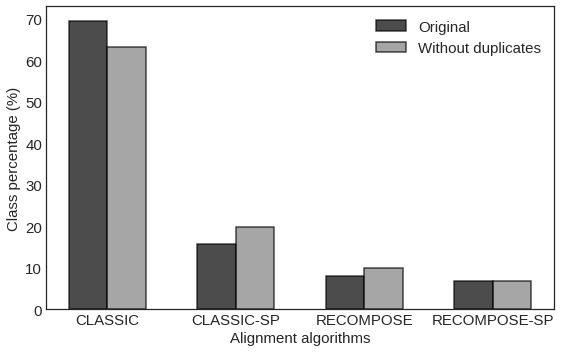

In [12]:
class_counts = base_df.loc[:,('Min', 'Total Time including setup (s)')].value_counts().values
percentile_classes = class_counts / class_counts.sum() * 100.

class_counts_uniq = uniq_base_df.loc[:,('Min', 'Total Time including setup (s)')].value_counts().values
percentile_classes_uniq = class_counts_uniq / class_counts_uniq.sum() * 100.

def visualize_classes(percentile_classes, percentile_classes_uniq):
    fig, ax = plt.subplots(figsize=(8, 5))

    algo_types = [
        'CLASSIC', 'CLASSIC-SP', 'RECOMPOSE', 'RECOMPOSE-SP'
    ]
    data_type = ['Original', 'Without duplicates']

    hatches = ['/', 'x', '\\', '.']
    colors = ['black', 'gray', 'green', 'purple']
    width = 0.3
    alpha = 0.7
    xticks = algo_types
    yticks = [i * 0.1 for i in range(11)]
    ind = np.arange(4)
    edgecolor = 'black'
    linewidth = 1.5
    fontsize=15

    rects1 = ax.bar(ind, percentile_classes, width, color=colors[0], alpha=alpha, 
                    edgecolor=edgecolor, linewidth=linewidth)
    rects2 = ax.bar(ind + width, percentile_classes_uniq, width, color=colors[1], 
                   alpha=alpha, edgecolor=edgecolor, linewidth=linewidth)

    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(xticks)
    ax.set_ylabel('Class percentage (%)', fontsize=fontsize)
    ax.set_xlabel('Alignment algorithms', fontsize=fontsize)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
        tick.label.set_horizontalalignment('center')
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)

    ax.legend((rects1[0], rects2[0]), data_type, fontsize=fontsize);
    
    return fig, ax

fig, ax = visualize_classes(percentile_classes, percentile_classes_uniq)
out_fp = './class-dist.svg'
fig.tight_layout()
fig.savefig(out_fp, bbox_inches='tight', rasterized=True)

### Check for statistically and scientifically significant differences

In [17]:
min_total_astar = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'astar'
min_total_inc3 = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'inc3'
min_total_r_astar = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'recomp-astar'
min_total_r_inc3 = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'recomp-inc3'

select_col_0 = ('model_trace_features', 'Total Time including setup (s)', 'Cost of alignment')
select_col_1 = ('trace_length', 'astar', 'inc3', 'recomp-astar', 'recomp-inc3')

stats_astar = base_df.loc[min_total_astar, idx[select_col_0, select_col_1]].describe()
stats_inc3 = base_df.loc[min_total_inc3, idx[select_col_0, select_col_1]].describe()
stats_r_astar = base_df.loc[min_total_r_astar, idx[select_col_0, select_col_1]].describe()
stats_r_inc3 = base_df.loc[min_total_r_inc3, idx[select_col_0, select_col_1]].describe()

select_col_0 = ('Total Time including setup (s)', 'Cost of alignment')
select_col_1 = ('astar', 'inc3', 'recomp-astar', 'recomp-inc3')

algo_type = ['astar', 'inc3', 'recomp-astar', 'recomp-inc3']
conditions = [min_total_astar, min_total_inc3, min_total_r_astar, min_total_r_inc3]

# diff_df_list = list()

# for algo, condition in zip(algo_type, conditions):
#     diff = base_df.loc[condition, idx[select_col_0, select_col_1]]
#     total_time = diff.loc[:, ('Total Time including setup (s)', algo)].values.reshape((diff.shape[0], 1))
#     diff.loc[:, idx[('Total Time including setup (s)'), slice(None)]] -= np.repeat(total_time, 4, axis=1)
    
#     diff_df_list.append(diff)

exact_stats_df_list = list()

select_col_0 = ('Total Time including setup (s)', 'is_valid')
select_col_1 = ('astar', 'inc3', 'recomp-astar', 'recomp-inc3')

for algo, condition in zip(algo_type, conditions):
    diff = base_df.loc[condition, idx[select_col_0, select_col_1]].copy()
#     # set invalid alignment computations with 300000 seconds
#     for algo1 in algo_type:
#         invalid = diff.loc[:, ('is_valid', algo1)] == False
#         diff.loc[invalid, ('Total Time including setup (s)', algo1)] = 300
    
    total_time = diff.loc[:, ('Total Time including setup (s)', algo)].values.reshape((diff.shape[0], 1))
    diff.loc[:, idx[('Total Time including setup (s)'), slice(None)]] -= np.repeat(total_time, 4, axis=1)
    
    # compute mean on valid alignments
    sub_select_col_0 = ('Total Time including setup (s)')
    astar_stats = diff.loc[(diff.loc[:, ('is_valid', 'astar')] == True), idx[sub_select_col_0, ('astar')]].to_frame().describe()
    inc3_stats = diff.loc[(diff.loc[:, ('is_valid', 'inc3')] == True), idx[sub_select_col_0, ('inc3')]].to_frame().describe()
    r_astar_stats = diff.loc[(diff.loc[:, ('is_valid', 'recomp-astar')] == True), idx[sub_select_col_0, ('recomp-astar')]].to_frame().describe()
    r_inc3_stats = diff.loc[(diff.loc[:, ('is_valid', 'recomp-inc3')] == True), idx[sub_select_col_0, ('recomp-inc3')]].to_frame().describe()
#     astar_stats = diff.loc[:, idx[sub_select_col_0, ('astar')]].to_frame().describe()
#     inc3_stats = diff.loc[:, idx[sub_select_col_0, ('inc3')]].to_frame().describe()
#     r_astar_stats = diff.loc[:, idx[sub_select_col_0, ('recomp-astar')]].to_frame().describe()
#     r_inc3_stats = diff.loc[:, idx[sub_select_col_0, ('recomp-inc3')]].to_frame().describe()    
    
    astar_stats.loc['n_invalid', ('Total Time including setup (s)', 'astar')] = diff.loc[:, ('is_valid', 'astar')].shape[0] - diff.loc[(diff.loc[:, ('is_valid', 'astar')] == True), ('is_valid', 'astar')].sum()
    inc3_stats.loc['n_invalid', ('Total Time including setup (s)', 'inc3')] = diff.loc[:, ('is_valid', 'inc3')].shape[0] - diff.loc[(diff.loc[:, ('is_valid', 'inc3')] == True), ('is_valid', 'inc3')].sum()
    r_astar_stats.loc['n_invalid', ('Total Time including setup (s)', 'recomp-astar')] = diff.loc[:, ('is_valid', 'recomp-astar')].shape[0] - diff.loc[(diff.loc[:, ('is_valid', 'recomp-astar')] == True), ('is_valid', 'recomp-astar')].sum()
    r_inc3_stats.loc['n_invalid', ('Total Time including setup (s)', 'recomp-inc3')] = diff.loc[:, ('is_valid', 'recomp-inc3')].shape[0] - diff.loc[(diff.loc[:, ('is_valid', 'recomp-inc3')] == True), ('is_valid', 'recomp-inc3')].sum()
    
    joined = pd.concat([astar_stats, inc3_stats, r_astar_stats, r_inc3_stats], axis=1)
    exact_stats_df_list.append(joined)

/home/jonathan/github-repos/2018/2018-09-26_align-algo-clf/alignclf-venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2819: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


In [18]:
import scipy.stats as stats

In [26]:
keys = ['CLASSIC', 'CLASSIC-SP', 'RECOMPOSE', 'RECOMPOSE-SP']
class_stats = pd.concat(exact_stats_df_list, keys=keys).unstack()
to_drop = [
    'count', 'min', '25%', '50%', '75%', 'max'
]
to_drop_0 = [
    'model_trace_features'
]
class_stats.drop(to_drop, level=2, axis=1)

def compute_se(df, algo):
    mean = df.loc[:, ('Total Time including setup (s)', algo, 'mean')]
    std = df.loc[:, ('Total Time including setup (s)', algo, 'std')]
    count = df.loc[:, ('Total Time including setup (s)', algo, 'count')]
    se = std / ((count) ** 0.5)
    df.loc[:, ('Total Time including setup (s)', algo, 'se')] = se
    df.loc[:, ('Total Time including setup (s)', algo, 'p-value')] = 2 * stats.norm.cdf(- abs(mean / se))
    return df

grouped = class_stats.drop(['min', '25%', '50%', '75%', 'max'], level=2, axis=1).groupby(level=1, axis=1)

df_list = []
for name, group in grouped:
    df_list.append(compute_se(group, name))

# pd.concat(df_list, axis=1).to_csv('./class-diff-1.csv', float_format='%.2f')
pd.concat(df_list, axis=1).loc[:, idx['Total Time including setup (s)', :, ('count', 'mean', 'se', 'p-value', 'n_invalid')]]

Total Time including setup (s)                                 \
                                      astar                                  
                                      count       mean n_invalid        se   
CLASSIC                            174794.0   0.000000       0.0  0.000000   
CLASSIC-SP                          39630.0   9.552764      22.0  0.095087   
RECOMPOSE                           17029.0   1.069610      32.0  0.064288   
RECOMPOSE-SP                        19947.0  15.874742      24.0  0.161641   

                                                                    \
                                inc3                                 
                   p-value     count      mean n_invalid        se   
CLASSIC                NaN  174770.0  0.287557      24.0  0.012026   
CLASSIC-SP    0.000000e+00   39652.0  0.000000       0.0  0.000000   
RECOMPOSE     3.709974e-62   17045.0  2.430760      16.0  0.108276   
RECOMPOSE-SP  0.000000e+00   19957.0  1.434787      14.0  0.041898   

                                                                         \
                            recomp-astar                                  
                    p-value        count       mean n_invalid        se   
CLASSIC       2.321272e-126     174794.0   0.041685       0.0  0.001228   
CLASSIC-SP              NaN      39652.0   8.144117       0.0  0.083732   
RECOMPOSE     1.288580e-111      17061.0   0.000000       0.0  0.000000   
RECOMPOSE-SP  5.174691e-257      19971.0  13.954618       0.0  0.156360   

                                                                       \
                            recomp-inc3                                 
                    p-value       count      mean n_invalid        se   
CLASSIC       9.957093e-253    174794.0  0.310842       0.0  0.012254   
CLASSIC-SP     0.000000e+00     39652.0  0.744105       0.0  0.026677   
RECOMPOSE               NaN     17061.0  2.763636       0.0  0.126351   
RECOMPOSE-SP   0.000000e+00     19971.0  0.000000       0.0  0.000000   

                             
                             
                    p-value  
CLASSIC       6.038013e-142  
CLASSIC-SP    3.230015e-171  
RECOMPOSE     4.720869e-106  
RECOMPOSE-SP            NaN

### Checking alignments where A* has minimum time but inc3 loses

In [69]:
min_total_astar = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'astar'
invalid_inc3 = base_df.loc[:, ('is_valid', 'inc3')] == False
df = base_df.loc[min_total_astar & invalid_inc3, :]

select_col_0 = ('model_trace_features', 'Cost of the alignment', 'result_dir')
select_col_1 = ('trace_length', 'astar', 'inc3')
df.loc[:,idx[select_col_0, select_col_1]].head()

Cost of the alignment       \
                                                              astar inc3   
model log              decomposition SP label                              
net2  net2-10-60-l5000 generic_50    2819                       624   10   
      net2-60-60-l5000 generic_50    2744                       632    4   
                                     2819                       624   34   
                                     3426                       582   34   
                                     3482                       618  164   

                                                                                                                                          result_dir  \
                                                                                                                                               astar   
model log              decomposition SP label                                                                                                          
net2  net2-10-60-l5000 generic_50    2819       ./results-agg/clst-2018-12-generic_50-net2/2018-12-06_18-12-52-692380_BPI2018-net2-nILP-astar-mono/9   
      net2-60-60-l5000 generic_50    2744      ./results-agg/clst-2018-12-generic_50-net2/2018-12-06_18-12-52-692380_BPI2018-net2-nILP-astar-mono/15   
                                     2819      ./results-agg/clst-2018-12-generic_50-net2/2018-12-06_18-12-52-692380_BPI2018-net2-nILP-astar-mono/15   
                                     3426      ./results-agg/clst-2018-12-generic_50-net2/2018-12-06_18-12-52-692380_BPI2018-net2-nILP-astar-mono/15   
                                     3482      ./results-agg/clst-2018-12-generic_50-net2/2018-12-06_18-12-52-692380_BPI2018-net2-nILP-astar-mono/15   

                                                                                                                                                     \
                                                                                                                                               inc3   
model log              decomposition SP label                                                                                                         
net2  net2-10-60-l5000 generic_50    2819       ./results-agg/clst-2018-12-generic_50-net2/2018-12-11_22-42-46-214238_BPI2018-net2-nILP-inc3-mono/9   
      net2-60-60-l5000 generic_50    2744      ./results-agg/clst-2018-12-generic_50-net2/2018-12-11_22-42-46-214238_BPI2018-net2-nILP-inc3-mono/15   
                                     2819      ./results-agg/clst-2018-12-generic_50-net2/2018-12-11_22-42-46-214238_BPI2018-net2-nILP-inc3-mono/15   
                                     3426      ./results-agg/clst-2018-12-generic_50-net2/2018-12-11_22-42-46-214238_BPI2018-net2-nILP-inc3-mono/15   
                                     3482      ./results-agg/clst-2018-12-generic_50-net2/2018-12-11_22-42-46-214238_BPI2018-net2-nILP-inc3-mono/15   

                                              model_trace_features  
                                                      trace_length  
model log              decomposition SP label                       
net2  net2-10-60-l5000 generic_50    2819                    114.0  
      net2-60-60-l5000 generic_50    2744                    103.0  
                                     2819                    114.0  
                                     3426                    107.0  
                                     3482                    102.0

### Testing classification with 10% of data

In [79]:
from sklearn import tree
import sklearn
from sklearn.model_selection import GridSearchCV
import graphviz
import time

In [108]:
base_df_10 = base_df.sample(frac=0.1, random_state=123)
uniq_base_df_10 = uniq_base_df.sample(frac=0.1, random_state=123)

class_map = {
    'astar': 0,
    'inc3': 1,
    'recomp-astar': 2,
    'recomp-inc3': 3
}

X = base_df.loc[:, idx['model_trace_features', slice(None)]]
y = base_df.loc[:, ('Min', 'Total Time including setup (s)')].map(class_map)

target_names = [
    'astar', 'inc3', 'recomp-astar', 'recomp-inc3'
]

feature_names = X.columns.get_level_values(level=1)

n_folds = 5

parameters = {'max_depth':range(3,20)}

start = time.time()

clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=7, cv=n_folds)
clf.fit(X=X, y=y)
end = time.time()
took = end - start
print('Took {:.2f}s'.format(end - start))

tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

Took 80.40s
0.6535005050143551 {'max_depth': 4}


In [31]:
base_df.loc[:, idx['Min', :]].apply(lambda col: col.value_counts(), axis=0)

Min                                          \
             Heuristics computed Heuristics derived Heuristics estimated   
astar                     101707              94307                13662   
inc3                      149756             145881                85642   
recomp-astar                   1                650                29435   
recomp-inc3                   14              10640               122739   

                                                                      \
             Markings added to closed set Markings polled from queue   
astar                              102868                      97071   
inc3                               146245                     152937   
recomp-astar                          106                          4   
recomp-inc3                          2259                       1466   

                                                                             \
             Markings queued Markings reached Time to compute alignment (s)   
astar                  98541           105499                        174302   
inc3                  142074           135176                         39510   
recomp-astar            1604             1996                         17685   
recomp-inc3             9259             8807                         19981   

                                             
             Total Time including setup (s)  
astar                                174794  
inc3                                  39652  
recomp-astar                          17061  
recomp-inc3                           19971

In [ ]:
base_df.loc[:, idx['Min', '']]

In [99]:
base_df.shape[0] * 0.001

251.478

In [110]:
start = time.time()

clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=100)
clf = clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file='./tree.dot', 
                                feature_names=feature_names, 
                               class_names=target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
# graph.render('clf')
# graph
end = time.time()
took = end - start
print('Took {:.2f}s'.format(end - start))

Took 1.55s


In [76]:
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.plot(range(3, 20), scores)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'cv_results'